In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
digits = load_digits()

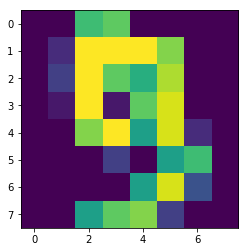

In [8]:
import matplotlib.pyplot as plt

plt.imshow(digits.images[9])

In [4]:
X = digits.data
y = digits.target

In [5]:
default_tree = DecisionTreeClassifier()
ans1 = cross_val_score(DecisionTreeClassifier(), X, y, cv = 10).mean()
with open('bagging_ans_1.txt', 'w') as f:
    f.write('%f' % ans1)
ans1

In [16]:
from sklearn.ensemble import BaggingClassifier

ans2 = cross_val_score(BaggingClassifier(n_estimators=100), X, y, cv = 10).mean()
with open('bagging_ans_2.txt', 'w') as f:
    f.write('%f' % ans2)
ans2

0.9254584116573887

In [55]:
ans3 = cross_val_score(BaggingClassifier(n_estimators=100, max_features=8), X, y, cv = 10, n_jobs=-1).mean()
with open('bagging_ans_3.txt', 'w') as f:
    f.write('%f' % ans3)
ans3

0.9337733260805587

In [57]:
ans4 = cross_val_score(BaggingClassifier(DecisionTreeClassifier(max_features='sqrt'), n_estimators=100), X, y, cv = 10, n_jobs=-1).mean()
with open('bagging_ans_4.txt', 'w') as f:
    f.write('%f' % ans4)
ans4

0.9500375723398562

In [46]:
from sklearn.ensemble import RandomForestClassifier
ans5 = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv = 10, n_jobs=-1).mean()
ans5

0.9533107220246034

CPU times: user 1.78 s, sys: 148 ms, total: 1.93 s
Wall time: 59.8 s


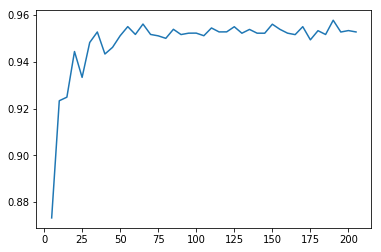

In [34]:
%%time
import numpy as np

quality = lambda x: cross_val_score(RandomForestClassifier(n_estimators=x), X, y, cv = 10, n_jobs=-1).mean()
n_estim = np.arange(5, 210, 5)
plt.plot(n_estim, list(map(quality, n_estim)))

CPU times: user 526 ms, sys: 24.7 ms, total: 551 ms
Wall time: 34.1 s


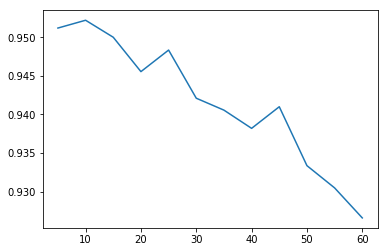

In [35]:
%%time

quality = lambda x: cross_val_score(RandomForestClassifier(n_estimators=100, max_features = x), X, y, cv = 10, n_jobs=-1).mean()
n_feat = np.arange(5, 64, 5)
plt.plot(n_feat, list(map(quality, n_feat)))

CPU times: user 478 ms, sys: 37.2 ms, total: 515 ms
Wall time: 12.4 s


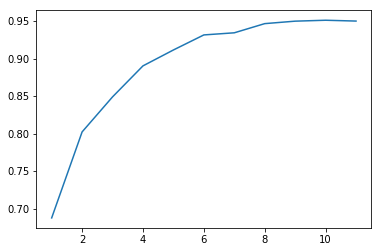

In [36]:
%%time

quality = lambda x: cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=x), X, y, cv = 10, n_jobs=-1).mean()
n_deapth = np.arange(1, 12)
plt.plot(n_deapth, list(map(quality, n_deapth)))


In [38]:
with open('bagging_ans_5.txt', 'w') as f:
    f.write('2 3 4 7')
